# Converting between different data types and scaling values

This recipe tells you how to change the data type of matrix elements from `uint8` to `float32` and perform arithmetic operations without worrying about clamping values (and then convert everything back to `uint8`).

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib auto
%pylab inline


def print_image(header,name,np_arr,start_First=0, end_First=1, start_Second=0, end_Second=2):
    print(header)
    print('  Shape:', np_arr.shape, '  Data type:', np_arr.dtype)
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            if i == end_First-1:
                print(']  {}:'.format(name), np_arr.dtype)
            else:
                 print("]")
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            if i == end_First-1:
                print(']  {}:'.format(name), np_arr.dtype)
            else:
                print("]")

def plt_view_image(plt,list_images):
    #%pylab inline
    plt.figure(figsize=(15,6))
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis('off')
        plt.title(name)
        plt.imshow(img,cmap='gray' )
        plot_number = plot_number + 1
    plt.show()
#help("modules")   
import sys             
print('\n'.join(sys.path))
#pip list"

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S02\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s02\env

d:\html_doc\program\opencv\packt\s02\env\lib\site-packages
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\pip-20.0.2-py3.8.egg
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython


data/Lena.png
  Shape: (512, 512, 3)   Data type: uint8
[ [125 137 226] [125 137 226] [133 137 223] [128 136 223] [120 138 226] [116 129 226] [123 138 228] ]  image: uint8


<Figure size 216x216 with 0 Axes>

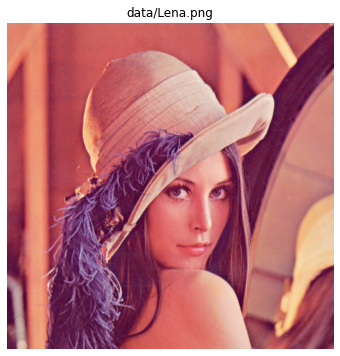

In [2]:
# Let's start by importing OpenCV and Numpy
import cv2
import numpy as np

# We'll then read our image
image = cv2.imread('data/Lena.png')

#############################################################
# and print its shape and data type
print_image('data/Lena.png', 'image',  image,0,1,0,7)
plt.figure(figsize=(3,3))
plt_view_image(plt,[["data/Lena.png",image[:,:,[2,1,0]]]  ])

# display the image
cv2.imshow('image', image)
cv2.waitKey()
cv2.destroyAllWindows()

In [3]:
# Let's check the values of
# top-left four pixel
print(image[:2,:2,:3])

#############################################################
print_image('data/Lena.png', 'image',  image,0,2,0,2)

# As you can see these are integers
# Ranging from 0 to 255
# 0 being the darkest i.e black
# 255 being the brightest i.e white

[[[125 137 226]
  [125 137 226]]

 [[125 137 226]
  [125 137 226]]]
data/Lena.png
  Shape: (512, 512, 3)   Data type: uint8
[ [125 137 226] [125 137 226] ]
[ [125 137 226] [125 137 226] ]  image: uint8


data/Lena.png
  Shape: (512, 512, 3)   Data type: uint8
[ [125 137 226] [125 137 226] [133 137 223] [128 136 223] [120 138 226] [116 129 226] [123 138 228] [124 134 227] ]  image: uint8


<Figure size 216x216 with 0 Axes>

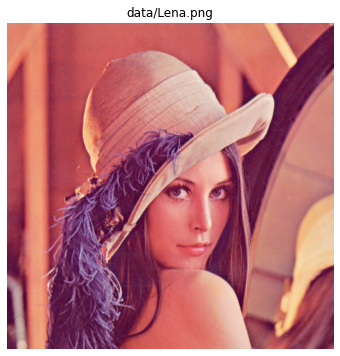

In [4]:
# In this block, we'll first convert 
# the image to float and then divide it by 255
image_float = np.copy(image.astype(np.float32) / 255)


#############################################################
# We'll print the shape and data type of image
print_image('data/Lena.png', 'image',  image,0,1,0,8)
plt.figure(figsize=(3,3))
plt_view_image(plt,[["data/Lena.png",image[:,:,[2,1,0]]]  ])

[[[0.49019608 0.5372549  0.8862745 ]
  [0.49019608 0.5372549  0.8862745 ]]

 [[0.49019608 0.5372549  0.8862745 ]
  [0.49019608 0.5372549  0.8862745 ]]]
image_float
  Shape: (512, 512, 3)   Data type: float32
[ [0.49019608 0.5372549  0.8862745 ] [0.49019608 0.5372549  0.8862745 ] [0.52156866 0.5372549  0.8745098 ] [0.5019608  0.53333336 0.8745098 ] [0.47058824 0.5411765  0.8862745 ] [0.45490196 0.5058824  0.8862745 ] [0.48235294 0.5411765  0.89411765] [0.4862745 0.5254902 0.8901961] ]  image_float: float32


<Figure size 216x216 with 0 Axes>

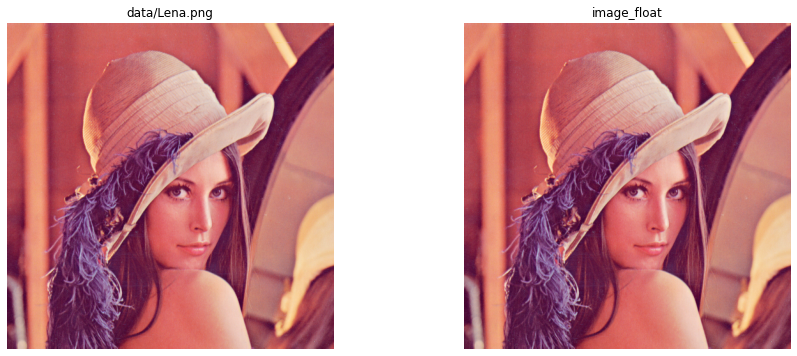

In [5]:
# Now let's check the same pixels
print(image_float[:2,:2,:3])

#############################################################
# We'll print the shape and data type of image
print_image('image_float', 'image_float',  image_float,0,1,0,8)
plt.figure(figsize=(3,3))
plt_view_image(plt,[["data/Lena.png",image[:,:,[2,1,0]]],["image_float",image_float[:,:,[2,1,0]]]  ])
# As you can see the values are scaled now

In [6]:
# numpy.clip(a, a_min, a_max, out=None, **kwargs)[source]
#      Clip (limit) the values in an array.
#      Given an interval, values outside the interval are clipped to the interval edges. 
#      For example, if an interval of [0, 1] is specified, values smaller than 0 become 0, 
#                   and values larger than 1 become 1.
# Equivalent to but faster than np.maximum(a_min, np.minimum(a, a_max)). 
# No check is performed to ensure a_min < a_max.
a = np.arange(10)
print(a)
print(np.clip(a, 1, 8))
print(np.clip(a, 3, 6))

[0 1 2 3 4 5 6 7 8 9]
[1 1 2 3 4 5 6 7 8 8]
[3 3 3 3 4 5 6 6 6 6]


image_float
  Shape: (512, 512, 3)   Data type: float32
[ [0.49019608 0.5372549  0.8862745 ] [0.49019608 0.5372549  0.8862745 ] [0.52156866 0.5372549  0.8745098 ] [0.5019608  0.53333336 0.8745098 ] [0.47058824 0.5411765  0.8862745 ] [0.45490196 0.5058824  0.8862745 ] [0.48235294 0.5411765  0.89411765] [0.4862745 0.5254902 0.8901961] [0.49803922 0.54901963 0.8901961 ] [0.46666667 0.53333336 0.88235295] ]  image_float: float32
clipped_image
  Shape: (512, 512, 3)   Data type: float32
[ [0.98039216 1.         1.        ] [0.98039216 1.         1.        ] [1. 1. 1.] [1. 1. 1.] [0.9411765 1.        1.       ] [0.9098039 1.        1.       ] [0.9647059 1.        1.       ] [0.972549 1.       1.      ] [0.99607843 1.         1.        ] [0.93333334 1.         1.        ] ]  clipped_image: float32


<Figure size 720x720 with 0 Axes>

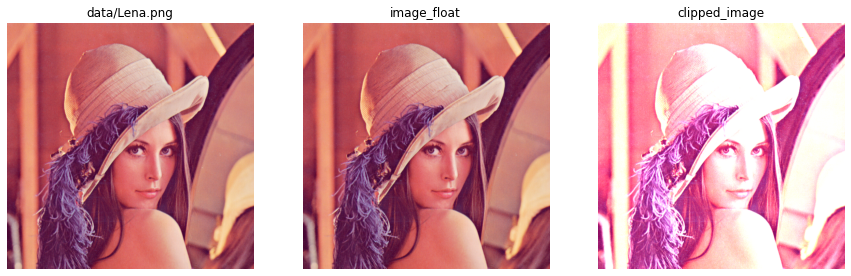

In [7]:
# We'll now multiply the image pixels by 2
# and limit the image values b/w 0 & 1
clipped_image = np.clip(image_float*2, 0, 1)



#############################################################
print_image('image_float',   'image_float',    image_float,0,1,0,10)
print_image('clipped_image', 'clipped_image',  clipped_image,0,1,0,10)
plt.figure(figsize=(10,10))
plt_view_image(plt,[["data/Lena.png",image[:,:,[2,1,0]]],
                    ["image_float",  image_float[:,:,[2,1,0]]],
                    ["clipped_image",clipped_image[:,:,[2,1,0]]]
                   ])

# Let's check the results
cv2.imshow('image', image)
cv2.imshow('image_float, clipped_image', np.hstack([image_float, clipped_image]))
cv2.waitKey()
cv2.destroyAllWindows()

In [8]:
# Let's check the updated pixels
print(image_float[:2,:2,:3])
clipped_image[:2,:2,:3]

[[[0.49019608 0.5372549  0.8862745 ]
  [0.49019608 0.5372549  0.8862745 ]]

 [[0.49019608 0.5372549  0.8862745 ]
  [0.49019608 0.5372549  0.8862745 ]]]


array([[[0.98039216, 1.        , 1.        ],
        [0.98039216, 1.        , 1.        ]],

       [[0.98039216, 1.        , 1.        ],
        [0.98039216, 1.        , 1.        ]]], dtype=float32)

image
  Shape: (512, 512, 3)   Data type: uint8
[ [125 137 226] [125 137 226] [133 137 223] [128 136 223] [120 138 226] [116 129 226] [123 138 228] [124 134 227] ]  image: uint8
image_float
  Shape: (512, 512, 3)   Data type: float32
[ [0.48235294 0.43137255 0.64705884] [0.48235294 0.43137255 0.64705884] [0.5058824  0.42745098 0.6431373 ] [0.49411765 0.44705883 0.6509804 ] [0.47843137 0.42352942 0.65882355] [0.45882353 0.39607844 0.6431373 ] [0.41960785 0.34901962 0.63529414] [0.40784314 0.32156864 0.6       ] ]  image_float: float32
clipped_image
  Shape: (512, 512, 3)   Data type: float32
[ [0.98039216 1.         1.        ] [0.98039216 1.         1.        ] [1. 1. 1.] [1. 1. 1.] [0.9411765 1.        1.       ] [0.9098039 1.        1.       ] [0.9647059 1.        1.       ] [0.972549 1.       1.      ] ]  clipped_image: float32
image_uint8
  Shape: (512, 512, 3)   Data type: uint8
[ [125 137 226] [125 137 226] [133 137 223] [128 136 223] [120 138 226] [116 129 226] [123 138 228] [12

<Figure size 720x720 with 0 Axes>

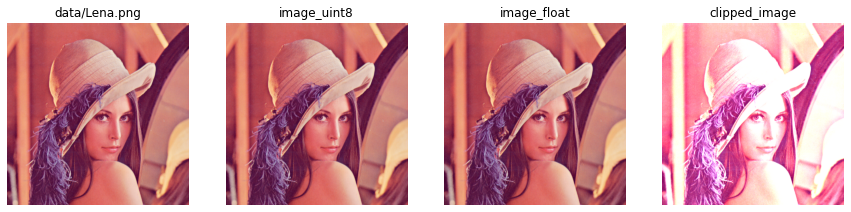

In [9]:
# So let's revert the scaled image 
# back to it's original scale
image_uint8 = (image_float * 255).astype(np.uint8)


#############################################################
# We'll print the shape and data type of image
print_image('image',   'image',    image,0,1,0,8)
print_image('image_float',   'image_float',    image_float,400,401,0,8)
print_image('clipped_image', 'clipped_image',  clipped_image,0,1,0,8)
print_image('image_uint8',   'image_uint8',    image_uint8,0,1,0,8)
plt.figure(figsize=(10,10))
plt_view_image(plt,[["data/Lena.png",image[:,:,[2,1,0]]],
                    ["image_uint8",image_uint8[:,:,[2,1,0]]],
                    ["image_float",  image_float[:,:,[2,1,0]]],
                    ["clipped_image",clipped_image[:,:,[2,1,0]]]
                   ])

for i in range(image_uint8.shape[0]):
    s1 = image_uint8[i]
    s2 = image[i]
    for j in range((len(s1))):
        #print(s1[j][0], s2[j][0], s1[j][0]!=s2[j][0],s1[j][0]==s2[j][0])
        if s1[j][0] != s2[j][0] or s1[j][1] != s2[j][1] or s1[j][2] != s2[j][2]:
            print(i,j, s1[j],s2[j])

# Display the results
cv2.imshow('image, image_uint8', np.hstack([image, image_uint8]))
cv2.imshow('image_float, clipped_image', np.hstack([image_float, clipped_image]))
cv2.waitKey()
cv2.destroyAllWindows()

In [10]:
image[:2,:2,:3]

array([[[125, 137, 226],
        [125, 137, 226]],

       [[125, 137, 226],
        [125, 137, 226]]], dtype=uint8)

In [11]:
image_uint8[:2,:2,:3]

array([[[125, 137, 226],
        [125, 137, 226]],

       [[125, 137, 226],
        [125, 137, 226]]], dtype=uint8)